In [26]:
%matplotlib notebook
import sklearn
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas
import pylab
from datasets.synbols import Synbols
import seaborn as sns

<IPython.core.display.Javascript object>


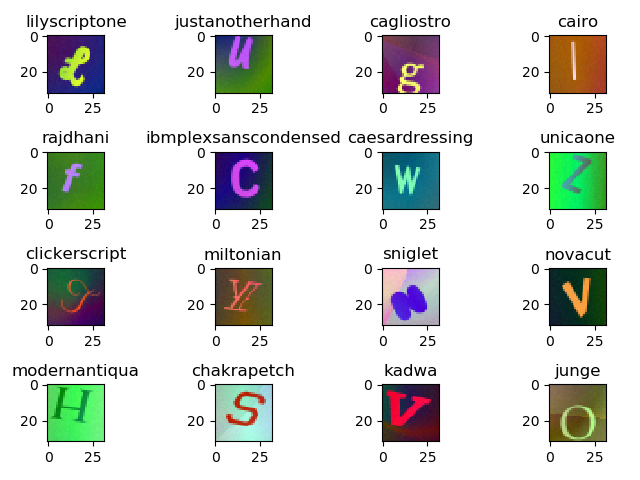

In [10]:
dataset = Synbols('/mnt/datasets/public/research/synbols/latin_res=32x32_n=100000.npz', "train", "font")
w = 4
h = 4
for i in range(h):
    for j in range(w):
        n = i * h + j
        pylab.subplot(h, w, n + 1)
        pylab.imshow(dataset[n][0])
        pylab.title(dataset.labelset[dataset[n][1]])
pylab.tight_layout()

In [29]:
loaded = np.load('/mnt/projects/vision_prototypes/synbols/logs/6a02fee9a453cf13e59eef0fbbddb2bd/resnet18_preds.npy', allow_pickle=True).item()
preds = loaded['logits'].argmax(-1)
confmat = confusion_matrix(loaded['targets'], preds)
confmat *= 1 - np.eye(confmat.shape[0], dtype=int)
confmat.max()

6

<IPython.core.display.Javascript object>


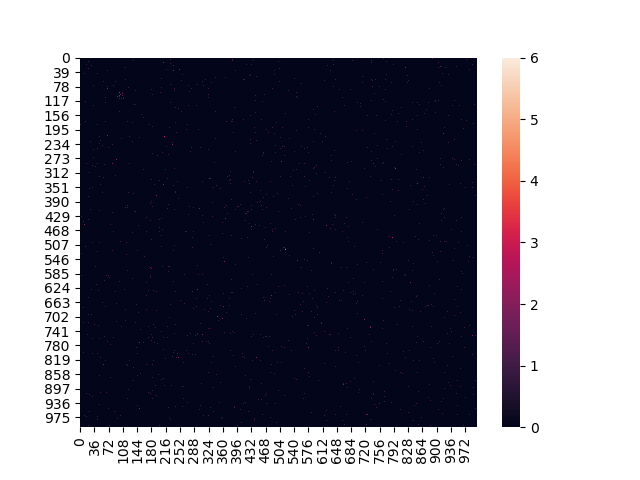

In [30]:
sns.heatmap(confmat)